# Google Cloud Vision API - Use Case for detecting Facial Emotions within an Image

In [1]:
# Import all the important libraries for this project

In [2]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import io
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from google.cloud import vision
from google.cloud.vision import AnnotateFileRequest
from google.protobuf.json_format import MessageToDict

In [3]:
# Import GCP credentials from JSON document downloaded

In [4]:
#Please provide the path where your JSON document is located /drive
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="GCP - Vision API JSON.json"

In [5]:
# Import the image with the face/s on which emotion detection is to be run

In [6]:
import io

path = 'Happy Friends.jpg'
with io.open(path, 'rb') as image_file:
        content = image_file.read()

In [7]:
# A generic friendly portrait

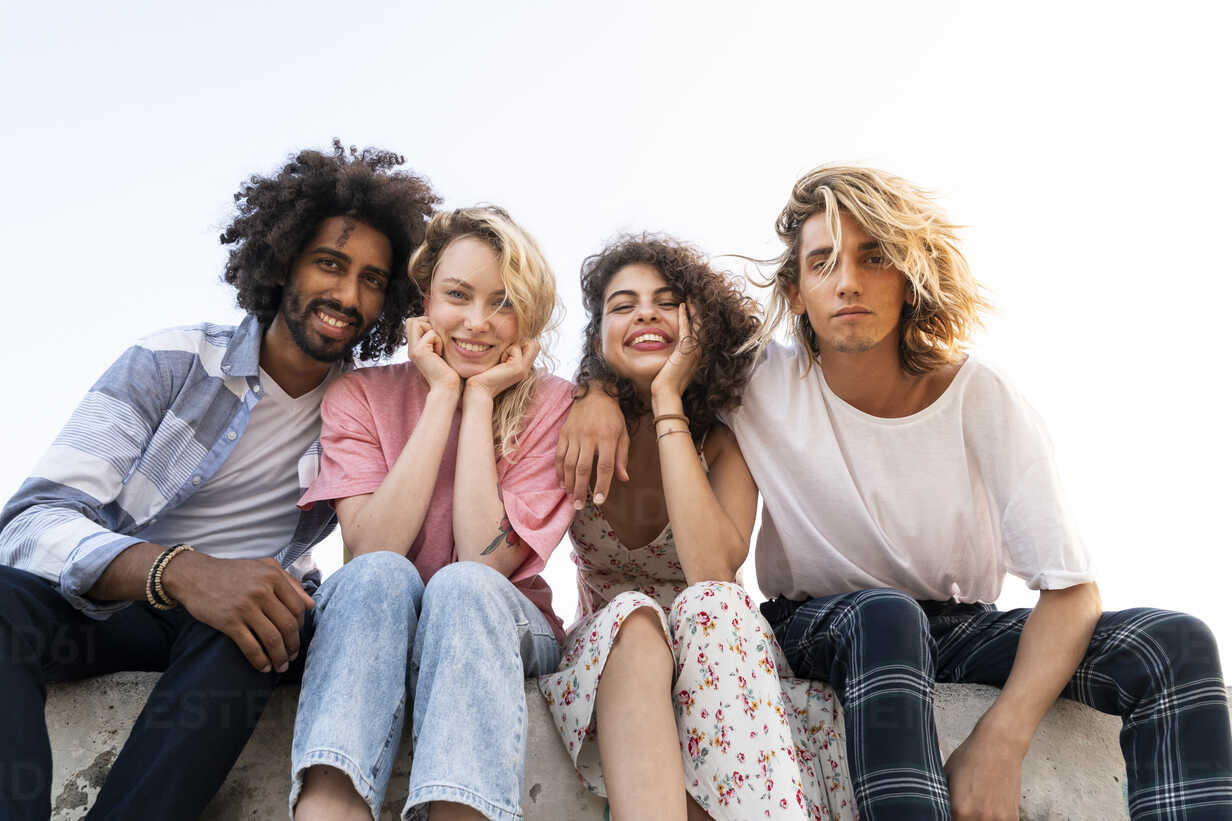

In [8]:
Image(path)

# Objective:
# Identify the emotion likelihood for all faces detected in the image.

In [10]:
# Map Vision API

In [11]:
image = vision.Image(content=content)

In [12]:
client = vision.ImageAnnotatorClient()

In [13]:
# Call Vision API

In [16]:
response = client.face_detection(image=image)
faces = response.face_annotations

# Output: Facial Emotion Detection Likelihood

In [15]:
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                   'LIKELY', 'VERY_LIKELY')
print('Faces:')

for face in faces:
    print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
    print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
    print('sorrow: {}'.format(likelihood_name[face.sorrow_likelihood]))
    print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in face.bounding_poly.vertices])

    print('face bounds: {}'.format(','.join(vertices)))

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))

Faces:
joy: VERY_LIKELY
anger: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (262,182),(417,182),(417,362),(262,362)
joy: VERY_UNLIKELY
anger: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (770,179),(933,179),(933,368),(770,368)
joy: VERY_LIKELY
anger: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (402,216),(549,216),(549,387),(402,387)
joy: VERY_LIKELY
anger: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (582,239),(710,239),(710,388),(582,388)


# Thank You!